In [1]:
# Project Overview:

# Aim: 
# To develop a predictive model for an insurance company to estimate 
# health insuarance primiums based on factors like age, BMI & medical 
# history. The project has two phases:

# Scope:
# 1. Clean data (~5k data points) and perform EDA.
# 2. Develop, train and evaluate mutiple models, and choose the best one.
# 3. Deploy the model on a cloud platform.
# 4. Build Streamlit-based app for interaction (mock-up provided).
# 5. Testing and validation of model with real-world data.
# 6. Generate documentation for app's interactive interface.

# Phase 1: (Minimum Viable Product - MVP)
# Develop and deploy a predictive model with streamlit application.
# Model accuracy required > 97%.
# Residual Errors required < 10% on at least 95% of the data.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor

# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [3]:
# Load the data into a dataframe
df = pd.read_excel("premiums.xlsx")

# df.head(3) # first 3 rows

# Display three random rows
df.sample(3)


,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Thousands,Medical History,Insurance_Plan,Annual_Premium_Amount
10674,18,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,25K - 40K,34,No Disease,Bronze,672
19542,43,Male,Northwest,Married,4,Normal,Regular,Business-Owner,25K - 40K,35,High blood pressure,Silver,1893
44467,22,Female,Southwest,Married,3,Underweight,No Smoking,Salaried,<10K,5,Thyroid,Bronze,449


In [4]:
# Check rows, columns in df
df.shape[0], df.shape[1]


(50000, 13)

In [5]:
# Check the column names in df
df.columns


Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Thousands', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount'],
      dtype='object')

In [6]:
# Replace spaces in column names with an underscore
# Convert column names to python snake-case convention
# Assign changes columns names back to df

df.columns = df.columns.str.replace(' ', '_').str.lower()


In [7]:
# Check the new column names
df.columns


Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_thousands', 'medical_history', 'insurance_plan',
       'annual_premium_amount'],
      dtype='object')

In [8]:
# Double-check the new column names in df
df.sample(3)


,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_thousands,medical_history,insurance_plan,annual_premium_amount
22764,48,Male,Southwest,Unmarried,1,Obesity,Regular,Business-Owner,25K - 40K,36,Thyroid,Silver,2591
37032,25,Male,Southeast,Unmarried,0,Overweight,Regular,Salaried,25K - 40K,33,High blood pressure,Bronze,845
14443,18,Female,Southwest,Unmarried,2,Normal,No Smoking,Freelancer,10K - 25K,14,No Disease,Bronze,585


In [9]:
# Check for null (NA) values in df
df.isna().sum()


age                       0
gender                    0
region                    0
marital_status            0
number_of_dependants      0
bmi_category              0
smoking_status           11
employment_status         2
income_level             13
income_thousands          0
medical_history           0
insurance_plan            0
annual_premium_amount     0
dtype: int64

In [10]:
# -smoking_status column has 11 NA entries
# -employment_status column has 2 NA entries
# -income_level column has 13 NA entries

# => In a seperate attempt, I will try to replace them. IMPUTING ( univariate / bivariate )

# FOR NOW,Since these are very small comprared to 50k entires we can drop them all. PRUNING
# Also, update the df with removed entries
df.dropna(inplace=True)

# Check if PRUNING worked - we should now have all 0 NA values
df.isna().sum()


age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_thousands         0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [11]:
# Check for duplicates (boolean value telling if row is duplicated or not. True is duplicate. False is unique).
df.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 49976, dtype: bool

In [12]:
# This is will count the trues in the column
df.duplicated().sum()


np.int64(3)

In [13]:
# Let's see these duplicated rows (check); and then drop them as 3 is << 50K
# The keep=False parameter marks all instances of duplicated rows, not just the later ones.
# Print the duplicate values together
df[df.duplicated(keep=False)].sort_values( by = df.columns.tolist() )


,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_thousands,medical_history,insurance_plan,annual_premium_amount
6324,23,Female,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,<10K,8,No Disease,Bronze,521
8176,23,Female,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,<10K,8,No Disease,Bronze,521
5241,24,Male,Southwest,Unmarried,0,Normal,No Smoking,Salaried,<10K,4,No Disease,Bronze,680
47704,24,Male,Southwest,Unmarried,0,Normal,No Smoking,Salaried,<10K,4,No Disease,Bronze,680
12764,47,Female,Southeast,Married,3,Normal,No Smoking,Salaried,<10K,6,High blood pressure,Silver,1849
45472,47,Female,Southeast,Married,3,Normal,No Smoking,Salaried,<10K,6,High blood pressure,Silver,1849


In [14]:
# Now drop the duplicated 3 rows; and update the df
df.drop_duplicates(inplace=True)

# Check is any more duplicate rows exist - should give 0
df.duplicated().sum()


np.int64(0)

In [15]:
# Now print quick stats for the df (obviously, the result from columns with numeric values are printed)
df.describe()


,age,number_of_dependants,income_thousands,annual_premium_amount
count,49973.000000,49973.000000,49973.000000,49973.000000
mean,34.591960,1.711884,23.022172,1576.262382
std,15.000561,1.498189,24.222159,842.002461
min,18.000000,-3.000000,1.000000,350.000000
25%,22.000000,0.000000,7.000000,860.000000
50%,31.000000,2.000000,17.000000,1392.000000
75%,45.000000,3.000000,31.000000,2227.000000
max,356.000000,5.000000,930.000000,4347.000000


In [16]:
# -number_of_dependants column cannot have -3
# -age column cannot have 356
# -income_thousands column cannot be 930K
# Fix these outlier issues in df


In [17]:
# Tackle number_of_dependants issue first
# number_of_dependants column cannot have -3

# check how many datapoints have number_of_dependants < 0; print these rows
sum( df['number_of_dependants']<0 )


72

In [18]:
# So, 72 data points have number_of_dependants < 0; print these rows
df[ df['number_of_dependants']<0 ]


,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_thousands,medical_history,insurance_plan,annual_premium_amount
402,23,Female,Southwest,Unmarried,-3,Underweight,No Smoking,Freelancer,10K - 25K,18,No Disease,Silver,930
2245,18,Male,Southwest,Unmarried,-3,Overweight,No Smoking,Freelancer,25K - 40K,28,No Disease,Silver,809
2323,19,Male,Northwest,Unmarried,-3,Underweight,No Smoking,Freelancer,25K - 40K,40,No Disease,Bronze,464
2986,34,Female,Southeast,Married,-1,Underweight,Regular,Business-Owner,25K - 40K,35,High blood pressure & Heart disease,Silver,2299
3756,41,Male,Southwest,Married,-1,Obesity,Regular,Salaried,10K - 25K,21,Diabetes,Silver,2276
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48062,23,Male,Northwest,Unmarried,-1,Normal,No Smoking,Freelancer,> 40K,54,No Disease,Gold,1360
48086,36,Female,Southwest,Married,-1,Obesity,Occasional,Salaried,<10K,3,Diabetes,Bronze,1442
49256,60,Female,Southwest,Married,-1,Normal,No Smoking,Business-Owner,10K - 25K,21,Thyroid,Bronze,1014
49270,34,Male,Southeast,Married,-1,Obesity,No Smoking,Business-Owner,10K - 25K,17,Diabetes & Thyroid,Silver,2181


In [19]:
# Print the unique value in number_of_dependants column
df[ df['number_of_dependants']<0 ]['number_of_dependants'].unique()


array([-3, -1])

In [20]:
# So, number_of_dependants column has 2 unique values: -1 and -3
# Business manager suggested that this was a data collection error. It was 1 and 3, which by mistake got converted to -1 and -3, resp.
# So, correct it by take an absolute of all values in number_of_dependants
# No need to drop these 72 rows

df['number_of_dependants'] = abs( df['number_of_dependants'] )

# Check again if there are any -ve values left in df - this should give 0
sum( df['number_of_dependants']<0 )


0

In [21]:
# run describe on number_of_dependants - to double check - the min value should be 0
df['number_of_dependants'].describe()


count    49973.000000
mean         1.717327
std          1.491947
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: number_of_dependants, dtype: float64

In [22]:
# Tackle age issue second
# age column cannot have 356 as a person's age. Restrict it to 100 by droping values > 100.
sum( df['age']>100 )


58

In [23]:
# Print the unique values in this column
df[ df['age'] >100]['age'].unique()


array([224, 124, 136, 203, 356])

In [24]:
# There are about 58 entries which have age > 100
# Create a new copy with this dataframe
df1 = df[ df['age'] <= 100 ].copy()

# check if new df1 has any row with age > 100 - this should gove 0
sum( df1['age']>100 )


0

In [25]:
# double check by using describe() - max value should be <= 100
df1['age'].describe()


count    49915.000000
mean        34.402023
std         13.681721
min         18.000000
25%         22.000000
50%         31.000000
75%         45.000000
max         72.000000
Name: age, dtype: float64

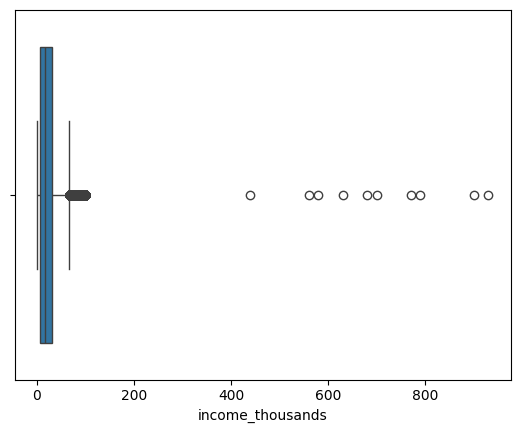

In [26]:
# Tackle income_thousands issue third
# income_thousands column cannot be 930K.

# Plot a boxplot to visualise the income_thousands column.
sns.boxplot( x = df1['income_thousands'] )
plt.show()


In [27]:
# It's better to plot and visualize boxplots for all numeric columns to visualise them (just in case)
numeric_cols = df1.select_dtypes(include='number').columns.to_list()
numeric_cols


['age', 'number_of_dependants', 'income_thousands', 'annual_premium_amount']

In [28]:
print(f"type(numeric_cols): {type(numeric_cols)} ")


type(numeric_cols): <class 'list'> 


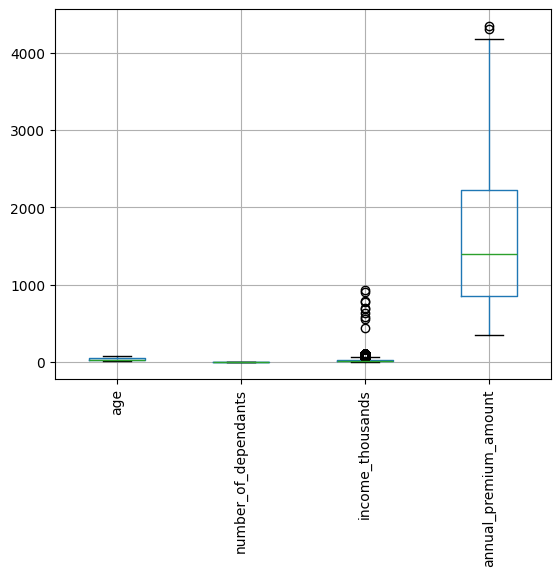

In [29]:
# Display the box plots for these numeric olumns
# df.select_dtypes(include='number').boxplot()
df1[numeric_cols].boxplot()
plt.xticks(rotation = 90)
plt.show()

# The plot is very helpful as it shows that two columns have outliers including, 
# - 'income_thousands'     : many outliers
# - 'annual_premium_amount': very few outliers (and very close to Q4) : no need to TREAT these outliers


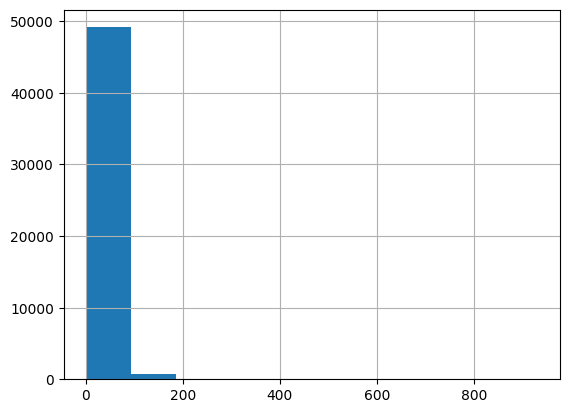

In [30]:
# To better understand the data in income_thousands column, plot a histogram
df1['income_thousands'].hist()
plt.show()


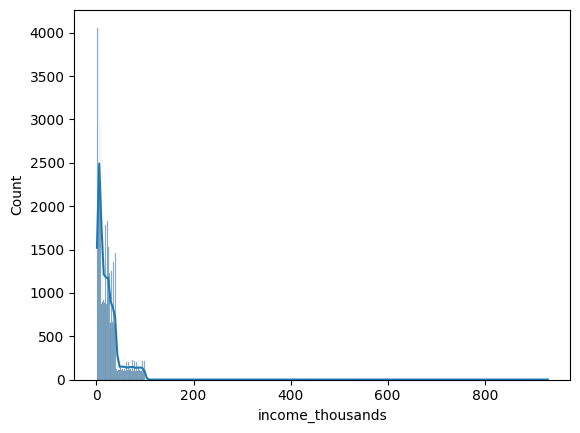

In [31]:
# I do not like this plot; I will plot the data in the other way
sns.histplot( data = df1['income_thousands'] , kde=True )
plt.show()

# The distribution of data in income_thousands is weavily skewed

In [32]:
# Get the IQR bounds for data column: write a function to do that
def get_iqr_bounds(col):
    # print(type(col)) : col has to be a pandas series
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)    
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    return Q1, Q3, IQR, lower_bound, upper_bound
    
# test the function get_iqr_bounds()
q1, q3, iqr, lower_b, upper_b = get_iqr_bounds(df1['income_thousands'])

lower_b, upper_b


(np.float64(-29.0), np.float64(67.0))

In [33]:
# 43k does not look like an extreame income realistically
# try another threshold...
lower_b = q1 - 3*iqr
upper_b = q1 + 3*iqr

lower_b, upper_b


(np.float64(-65.0), np.float64(79.0))

In [34]:
# 79k does not look like an extreame income realistically
# try another threshold...
lower_b = q1 - 4*iqr
upper_b = q1 + 4*iqr

lower_b, upper_b

# THIS UPPER BOUND LOOK more realistic (103K , even though many people get >103k per annum in the UK)


(np.float64(-89.0), np.float64(103.0))

In [35]:
# Ignore the lower bound bec in out data, the lower value of income_thousands == 1
# Just use this 103k upper_bound for 'income_thousands' column to remove the outliers 

threshold_income_thousands = upper_b
sum( df1['income_thousands'] > threshold_income_thousands )

# So, only 10 data rows have this extreame outlier income value.


10

In [36]:
# print these 10 rows
df1[ df1['income_thousands'] > threshold_income_thousands ]


,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_thousands,medical_history,insurance_plan,annual_premium_amount
2635,51,Male,Northwest,Married,4,Obesity,No Smoking,Business-Owner,> 40K,560,High blood pressure,Gold,3069
4220,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,> 40K,440,No Disease,Silver,1063
7775,35,Female,Northeast,Unmarried,0,Overweight,No Smoking,Salaried,> 40K,630,Diabetes,Gold,2401
9021,43,Male,Southeast,Married,3,Obesity,Regular,Salaried,> 40K,900,Diabetes & Thyroid,Gold,3084
10337,37,Female,Southeast,Married,3,Normal,No Smoking,Freelancer,> 40K,930,Diabetes,Silver,1594
10639,20,Female,Southwest,Unmarried,0,Normal,No Smoking,Freelancer,> 40K,580,Thyroid,Silver,1288
11456,21,Female,Southwest,Unmarried,0,Obesity,No Smoking,Freelancer,> 40K,700,No Disease,Bronze,742
15437,21,Female,Southeast,Unmarried,0,Normal,Occasional,Salaried,> 40K,790,No Disease,Silver,758
35446,59,Male,Northwest,Married,2,Obesity,Occasional,Business-Owner,> 40K,770,Thyroid,Gold,3111
40970,48,Male,Northeast,Married,4,Obesity,No Smoking,Salaried,> 40K,680,No Disease,Gold,2892


In [37]:
# Drop these 10 outliers (pruning) from df1
df2 = df1[ df1['income_thousands'] <= threshold_income_thousands ]

# check how many records now have income_thousands > threshold_income_thousands - should get a 0
sum( df2['income_thousands'] > threshold_income_thousands )


0

In [38]:
# double check the income_thousands column details in df2
df2['income_thousands'].describe()

# NOTE: the max value got limited to 100k now in df2


count    49905.000000
mean        22.890913
std         22.170975
min          1.000000
25%          7.000000
50%         17.000000
75%         31.000000
max        100.000000
Name: income_thousands, dtype: float64

In [39]:

# ===================== DATA CLEANING COMPLETE =============================================


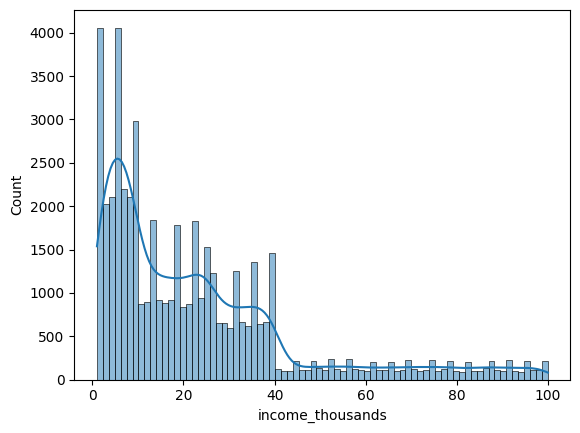

In [40]:
# Plot histogram of income_thousands in df2 (outliers excluded)
sns.histplot( data = df2['income_thousands'], kde = True)
plt.show()


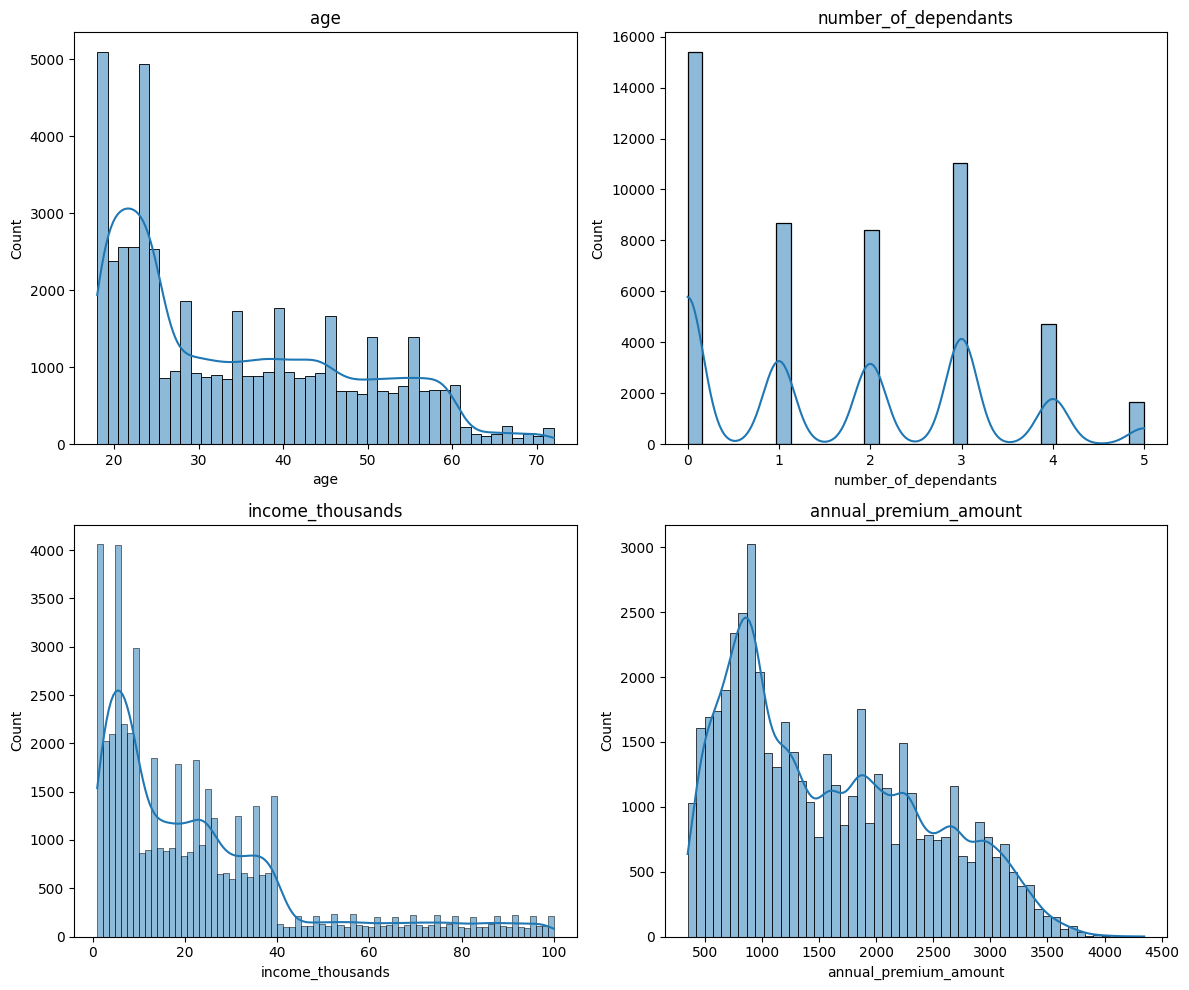

In [41]:
# Perform 'univariate' analysis of columns with numeric data in df2
# It is better to plot the histogram for all numeric columns for better visualization

fig, axes = plt.subplots(2,2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols): # I know numeric_cols have only 4 values
    # print(col)
    sns.histplot( data=df2[col], kde=True, ax=axes[i] )
    axes[i].set_title(col)

plt.tight_layout()
plt.show()
    

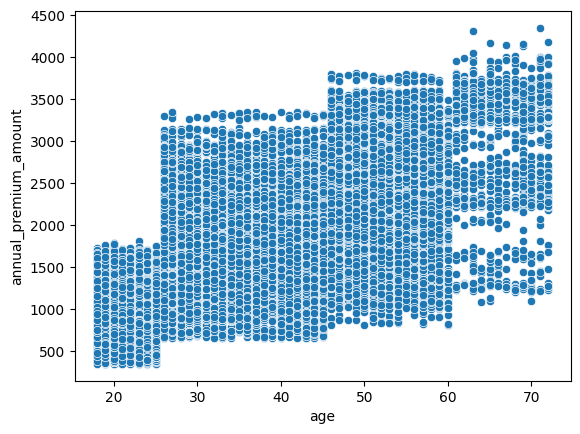

In [42]:
# Also, do bivariate analysis: something like scatterplot of age vs annual_premium_amount
sns.scatterplot(data=df2, x='age', y='annual_premium_amount')
plt.show()

# some pattern emerges - increasing age increases annual_premium_amount
# observed (approx.) bottleneck age points - 25/45/60


['age', 'number_of_dependants', 'income_thousands', 'annual_premium_amount']


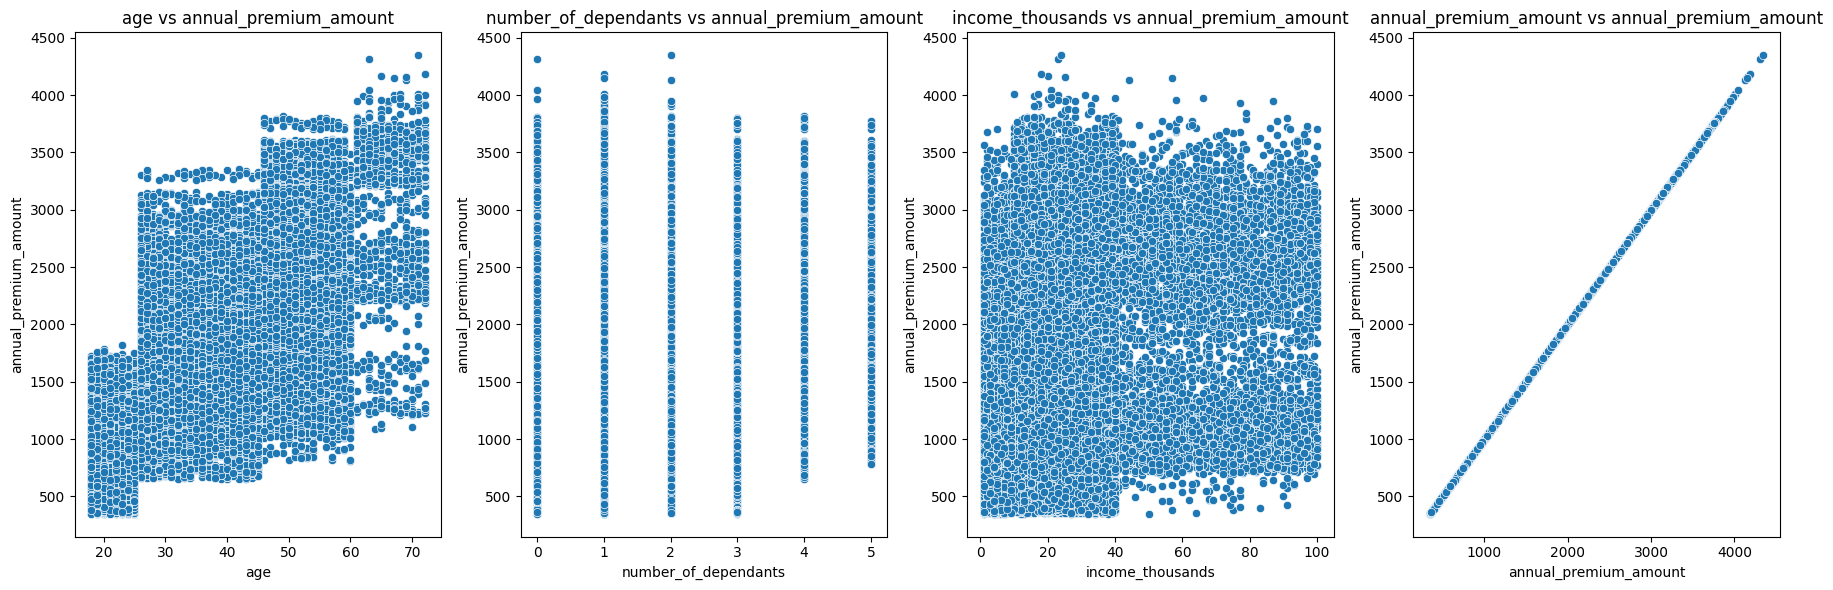

In [43]:
# Do the scatterplot for all numeric values
print(numeric_cols)

fig, axes = plt.subplots(1, len(numeric_cols), figsize=(18, 6))
axes      = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.scatterplot( data=df2, x=col, y='annual_premium_amount', ax=axes[i] )
    axes[i].set_title( f'{col} vs annual_premium_amount' )

plt.tight_layout()
plt.show()


In [44]:

# =================================================================================================================


In [45]:
# We have only looked at numeric data so far.
# Now look at the categorical data.

# check dtypes in df2
df2.dtypes


age                       int64
gender                   object
region                   object
marital_status           object
number_of_dependants      int64
bmi_category             object
smoking_status           object
employment_status        object
income_level             object
income_thousands          int64
medical_history          object
insurance_plan           object
annual_premium_amount     int64
dtype: object

In [46]:
# Extract the categorical columns (dtype 'object')
categorical_cols = df2.select_dtypes(include='object').columns.to_list()
categorical_cols


['gender',
 'region',
 'marital_status',
 'bmi_category',
 'smoking_status',
 'employment_status',
 'income_level',
 'medical_history',
 'insurance_plan']

In [47]:
# Print unique value for each column in categorical_cols
for col in categorical_cols:
    print(f"{col} :  {df2[col].unique()} ")

# Clearly 'smoking_status' column needs sorting as non-uniform values entered during data collection
# replace 'Smoking=0' with 'No Smoking'
# replace 'Does Not Smoke' with 'No Smoking'
# replace 'Not Smoking' with 'No Smoking'


gender :  ['Male' 'Female'] 
region :  ['Northwest' 'Southeast' 'Northeast' 'Southwest'] 
marital_status :  ['Unmarried' 'Married'] 
bmi_category :  ['Normal' 'Obesity' 'Overweight' 'Underweight'] 
smoking_status :  ['No Smoking' 'Regular' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking'] 
employment_status :  ['Salaried' 'Business-Owner' 'Freelancer'] 
income_level :  ['<10K' '10K - 25K' '> 40K' '25K - 40K'] 
medical_history :  ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease'] 
insurance_plan :  ['Bronze' 'Silver' 'Gold'] 


In [48]:
#  replace these value and make the 'smoking_status' column values consistent
df3 = df2.copy()

df3['smoking_status'] = df2['smoking_status'].replace({
    'Smoking=0'      : 'No Smoking',
    'Does Not Smoke' : 'No Smoking',
    'Not Smoking'    : 'No Smoking'
})

print( f"{ df3['smoking_status'].unique() }" )


['No Smoking' 'Regular' 'Occasional']


In [49]:
# Try to perfrom univariate analysis on categorical_cols - work with df3
pct_counts = {}

# First check the value count
for i, col in enumerate(categorical_cols):
    pct_counts[i] = df3[col].value_counts(normalize=True) # to get percentages
    # print( df3[col].value_counts(normalize=True) )
    # print('---')

# check the dictionary
for key, value in pct_counts.items():
    print(f"{key} : {value}")
    print('---')

# Actually, we did not have to make a dict, we could have just looped over each categorical_cols, calculated value_counts for each
# column, and then plotted each of them in a single loop -> more efficient.


0 : gender
Male      0.549644
Female    0.450356
Name: proportion, dtype: float64
---
1 : region
Southeast    0.350366
Southwest    0.303036
Northwest    0.200942
Northeast    0.145657
Name: proportion, dtype: float64
---
2 : marital_status
Unmarried    0.513536
Married      0.486464
Name: proportion, dtype: float64
---
3 : bmi_category
Normal         0.470213
Overweight     0.231259
Underweight    0.155335
Obesity        0.143192
Name: proportion, dtype: float64
---
4 : smoking_status
No Smoking    0.547841
Regular       0.313876
Occasional    0.138283
Name: proportion, dtype: float64
---
5 : employment_status
Salaried          0.419397
Freelancer        0.308546
Business-Owner    0.272057
Name: proportion, dtype: float64
---
6 : income_level
<10K         0.373510
10K - 25K    0.287927
25K - 40K    0.205851
> 40K        0.132712
Name: proportion, dtype: float64
---
7 : medical_history
No Disease                             0.423525
Diabetes                               0.191023
High 

In [50]:
# to exctract the percentatge values from dictionary
for i in range(len(pct_counts)):
    print( f"{pct_counts[i].index}, {pct_counts[i].values}" )


Index(['Male', 'Female'], dtype='object', name='gender'), [0.54964432 0.45035568]
Index(['Southeast', 'Southwest', 'Northwest', 'Northeast'], dtype='object', name='region'), [0.35036569 0.30303577 0.20094179 0.14565675]
Index(['Unmarried', 'Married'], dtype='object', name='marital_status'), [0.51353572 0.48646428]
Index(['Normal', 'Overweight', 'Underweight', 'Obesity'], dtype='object', name='bmi_category'), [0.47021341 0.23125939 0.15533514 0.14319206]
Index(['No Smoking', 'Regular', 'Occasional'], dtype='object', name='smoking_status'), [0.5478409  0.31387637 0.13828274]
Index(['Salaried', 'Freelancer', 'Business-Owner'], dtype='object', name='employment_status'), [0.41939685 0.30854624 0.27205691]
Index(['<10K', '10K - 25K', '25K - 40K', '> 40K'], dtype='object', name='income_level'), [0.37350967 0.28792706 0.20585112 0.13271215]
Index(['No Disease', 'Diabetes', 'High blood pressure', 'Thyroid',
       'Heart disease', 'Diabetes & High blood pressure',
       'High blood pressure & 

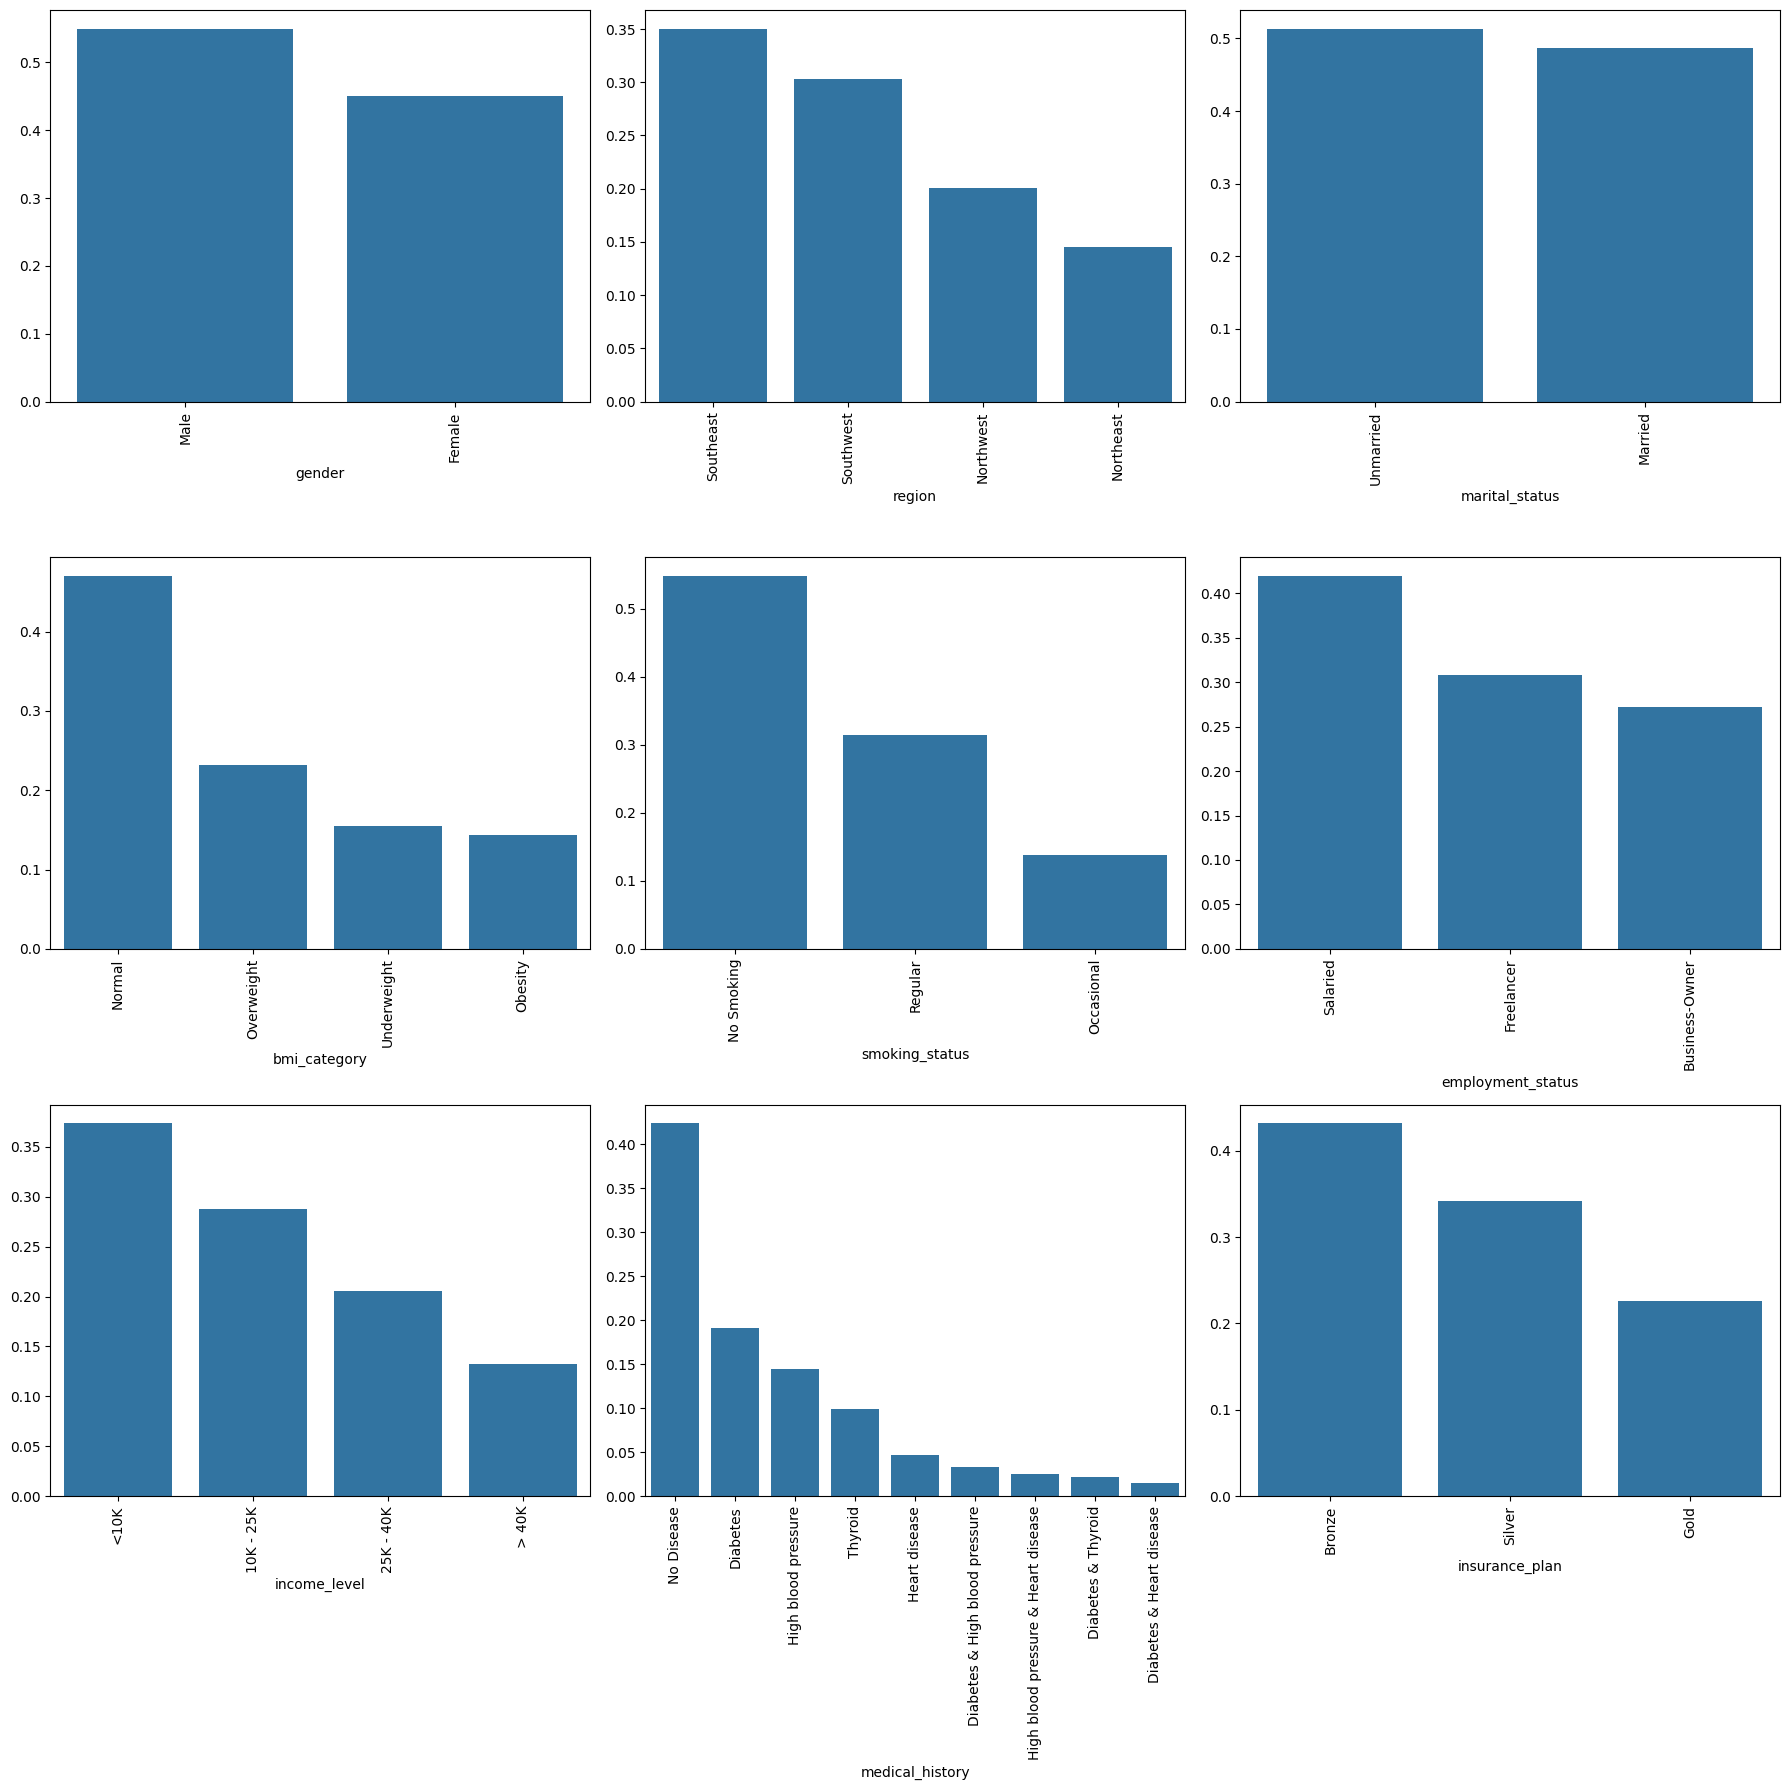

In [51]:
# Now draw the barplots for categorical_cols
fig, axes = plt.subplots(3, 3, figsize=(18,18))
axes = axes.flatten()

for i in pct_counts:
    sns.barplot( x=pct_counts[i].index, y=pct_counts[i].values, ax=axes[i])
    axes[i].tick_params(axis='x', labelrotation=90)

plt.tight_layout()
plt.show()
    

In [52]:
# Now performing bivariate analysis, for example, counts b/w 2 coatagores, like how many are male and female,
# and out of these, how many males vs females have bought bronze, silver and gold plans.

# Use crosstab function from pandas

# based on income_level, what type of insurance plan they have
crosstab = pd.crosstab( df3['income_level'], df3['insurance_plan'] ).sort_values(by="income_level")
crosstab


insurance_plan,Bronze,Gold,Silver
income_level,,,
10K - 25K,5307,3880,5182
25K - 40K,3683,2840,3750
<10K,12224,931,5485
> 40K,329,3653,2641


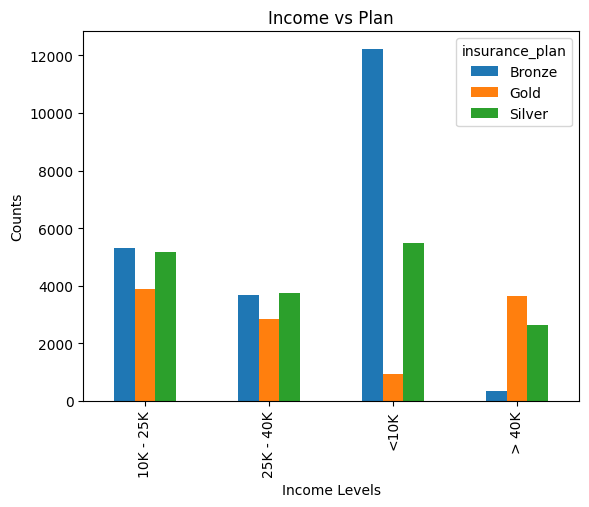

In [53]:
# print a barplot on this data
crosstab.plot(kind="bar")
plt.title("Income vs Plan")
plt.xlabel("Income Levels")
plt.ylabel("Counts")
plt.show()


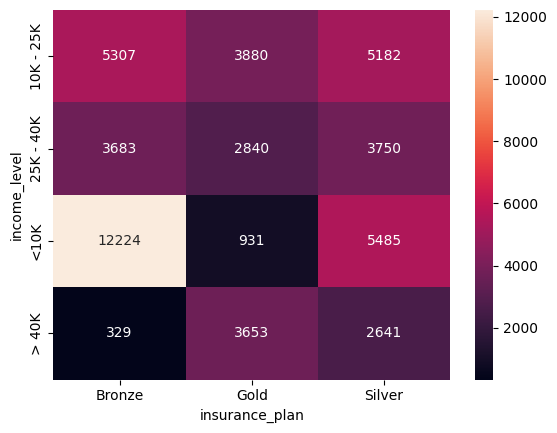

In [54]:
# See the same data (income_level vs insurance_plan) as a heatmap
sns.heatmap(crosstab, annot=True, fmt='d') 
plt.show()


In [55]:

# ====================== EDA COMPLETE =============================================


In [56]:
# Let's do some feature engineering
df3.sample(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_thousands,medical_history,insurance_plan,annual_premium_amount
26965,19,Female,Southeast,Unmarried,0,Normal,No Smoking,Salaried,> 40K,73,Diabetes & Thyroid,Gold,1149
31822,45,Male,Southeast,Married,3,Obesity,No Smoking,Business-Owner,<10K,1,High blood pressure & Heart disease,Bronze,1757
37515,29,Female,Southwest,Unmarried,1,Obesity,Occasional,Salaried,> 40K,46,Thyroid,Gold,2679


In [57]:
# print unique value in medical_history columns
df3['medical_history'].unique()


array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [58]:
# Convert these text values in numbers
# Business manager suggested to assign risk score for disease type
risk_scores = {
    "none"                : 0,
    "no disease"          : 0,
    "thyroid"             : 5,
    "diabetes"            : 6,
    "high blood pressure" : 6,
    "heart disease"       : 8        
}

# assign value to each column based on this dictionary. One call can have more than one disease as seen in unique value.
df4 = df3.copy()

df4['total_risk_scores'] = df3['medical_history'].apply(
    lambda x: sum( risk_scores.get(disease.lower().strip(), 0) for disease in x.lower().split(' & ') )    
)

# check the result
df4.sample(10)

# Works fine


,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_thousands,medical_history,insurance_plan,annual_premium_amount,total_risk_scores
12530,49,Female,Northeast,Married,3,Overweight,No Smoking,Business-Owner,10K - 25K,13,Diabetes,Gold,2851,6
24377,24,Female,Southeast,Unmarried,0,Underweight,No Smoking,Salaried,<10K,3,No Disease,Silver,1251,0
18068,41,Female,Southeast,Married,3,Obesity,Regular,Salaried,<10K,6,Diabetes,Bronze,1557,6
24196,46,Female,Northeast,Unmarried,0,Overweight,No Smoking,Business-Owner,<10K,8,No Disease,Silver,1843,0
45582,37,Female,Southeast,Married,2,Overweight,No Smoking,Freelancer,10K - 25K,14,Diabetes & High blood pressure,Silver,1995,12
11733,18,Male,Northeast,Married,3,Overweight,Regular,Business-Owner,10K - 25K,22,No Disease,Bronze,997,0
42525,20,Female,Southwest,Unmarried,0,Normal,No Smoking,Freelancer,<10K,1,No Disease,Gold,1563,0
30268,23,Male,Northeast,Unmarried,1,Overweight,Regular,Freelancer,<10K,9,No Disease,Bronze,638,0
46900,25,Male,Southeast,Unmarried,2,Normal,Regular,Salaried,10K - 25K,25,No Disease,Silver,817,0
32718,18,Female,Southeast,Unmarried,1,Normal,No Smoking,Salaried,> 40K,70,No Disease,Silver,1285,0


In [59]:
'''
# THIS WAS NOT REQUIRED AT THIS STAGE SILLY - COULD HAVE NORMALISED ALL COLUMNS AT THE END.

# Now normalize this total_risk_score column to 'normalized_risk_score'
max_score = df4['total_risk_scores'].max()
min_score = df4['total_risk_scores'].min()

df4['normalized_risk_scores'] = (df4['total_risk_scores'] - min_score)/(max_score - min_score)

# check the result
df4.sample(10)

# Works fine
'''

"\n# THIS WAS NOT REQUIRED AT THIS STAGE SILLY - COULD HAVE NORMALISED ALL COLUMNS AT THE END.\n\n# Now normalize this total_risk_score column to 'normalized_risk_score'\nmax_score = df4['total_risk_scores'].max()\nmin_score = df4['total_risk_scores'].min()\n\ndf4['normalized_risk_scores'] = (df4['total_risk_scores'] - min_score)/(max_score - min_score)\n\n# check the result\ndf4.sample(10)\n\n# Works fine\n"

In [60]:
# Now look at the insurance_plan column
df4['insurance_plan'].unique()


array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [61]:
# Since Bromze < Slver < Gold : we can do label encoding (no not need one-hot encoding)
insurance_plan_encode = {
    'Bronze':1, 
    'Silver':2, 
    'Gold'  :3
}
df5 = df4.copy()

df5['insurance_plan_encode'] = df4['insurance_plan'].map( insurance_plan_encode )

# check the result
df5.sample(5)

# Works fine


,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_thousands,medical_history,insurance_plan,annual_premium_amount,total_risk_scores,insurance_plan_encode
5318,19,Female,Northeast,Unmarried,0,Normal,Occasional,Business-Owner,25K - 40K,28,No Disease,Bronze,477,0,1
4536,24,Female,Northwest,Married,3,Obesity,Regular,Freelancer,10K - 25K,24,No Disease,Silver,1322,0,2
47702,21,Female,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10K - 25K,21,No Disease,Bronze,709,0,1
205,51,Male,Southeast,Married,3,Overweight,No Smoking,Business-Owner,<10K,3,Diabetes,Silver,2087,6,2
44259,19,Female,Northeast,Unmarried,1,Normal,No Smoking,Freelancer,10K - 25K,12,No Disease,Bronze,440,0,1


In [62]:
# Similarly, encode the income levels
income_level_encode = {
    '<10K'     :1, 
    '10K - 25K':2, 
    '25K - 40K':3, 
    '> 40K'    :4
}
df6 = df5.copy()

df6['income_level_encode'] = df5['income_level'].map( income_level_encode )

# check the result
df6.sample(5)

# works fine


,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_thousands,medical_history,insurance_plan,annual_premium_amount,total_risk_scores,insurance_plan_encode,income_level_encode
34573,25,Male,Northwest,Married,3,Normal,Regular,Freelancer,25K - 40K,39,No Disease,Bronze,625,0,1,3
28885,31,Male,Southwest,Married,5,Obesity,Regular,Business-Owner,> 40K,46,Diabetes & High blood pressure,Gold,3138,12,3,4
34988,24,Male,Northwest,Unmarried,0,Normal,No Smoking,Freelancer,> 40K,77,No Disease,Bronze,404,0,1,4
30465,20,Female,Northeast,Unmarried,2,Normal,Regular,Freelancer,<10K,8,No Disease,Bronze,612,0,1,1
11956,38,Female,Southeast,Married,3,Normal,Regular,Salaried,<10K,8,Thyroid,Bronze,1237,5,1,1


In [63]:
# first drop the [income_level, insurance_plan, medical_history] that were recently encoded - to reduce the df size
df7 = df6.copy()

df7 = df6.drop(['income_level', 'insurance_plan', 'medical_history'], axis=1)

# new df7 looks like the following
df7.sample(5)


,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_thousands,annual_premium_amount,total_risk_scores,insurance_plan_encode,income_level_encode
9322,21,Male,Southeast,Unmarried,1,Normal,No Smoking,Salaried,46,498,0,1,4
20263,56,Male,Southeast,Married,2,Normal,Occasional,Salaried,85,1912,6,2,4
38646,27,Male,Northwest,Married,3,Overweight,Regular,Salaried,4,1383,6,1,1
46438,23,Female,Northeast,Unmarried,0,Normal,No Smoking,Salaried,63,1039,5,2,4
47290,51,Female,Southwest,Married,4,Underweight,No Smoking,Freelancer,9,1938,6,2,1


In [64]:
# for the left over NOMIAL columns apply one-hot encoding
# I do not want True/False, so supply 1/0 insteads
df8 = df7.copy()

nominal_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']
df8 = pd.get_dummies(df7, columns=nominal_cols, drop_first=True, dtype=int)

# check the new df8
df8.sample(10)


,age,number_of_dependants,income_thousands,annual_premium_amount,total_risk_scores,insurance_plan_encode,income_level_encode,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Freelancer,employment_status_Salaried
4915,34,3,6,1049,6,1,1,0,0,0,1,0,0,0,1,1,0,0,1
39102,25,0,7,902,0,1,1,1,0,0,1,1,0,0,0,0,0,1,0
5059,24,0,5,805,11,2,1,1,0,0,1,1,0,0,1,0,0,0,1
33841,20,2,68,1377,14,3,4,0,0,1,0,1,0,0,0,0,0,1,0
25079,23,0,42,868,0,2,4,0,0,1,0,1,0,0,1,0,0,1,0
32710,29,1,25,2033,6,2,3,1,0,1,0,1,0,1,0,0,1,0,1
3681,32,2,17,2063,6,2,2,0,0,0,1,0,1,0,0,1,0,0,0
32928,30,2,38,1429,0,2,3,0,0,1,0,1,0,0,1,0,0,1,0
24310,25,1,44,1617,0,3,4,0,1,0,0,1,0,0,0,0,0,0,1
48836,58,3,23,2866,6,3,2,1,0,1,0,0,0,1,0,0,0,0,0


In [65]:
# change all column header to lowercase
df8.columns = df8.columns.str.lower()


In [66]:
# check the new df8 column names
df8.sample(10)


,age,number_of_dependants,income_thousands,annual_premium_amount,total_risk_scores,insurance_plan_encode,income_level_encode,gender_male,region_northwest,region_southeast,region_southwest,marital_status_unmarried,bmi_category_obesity,bmi_category_overweight,bmi_category_underweight,smoking_status_occasional,smoking_status_regular,employment_status_freelancer,employment_status_salaried
14695,24,0,40,992,0,1,3,0,0,0,1,1,1,0,0,0,0,0,1
30371,18,2,16,674,0,1,2,1,0,0,1,0,0,0,1,0,0,0,0
49658,28,0,16,1990,5,2,2,1,0,0,1,1,1,0,0,0,0,0,1
12789,51,3,26,3536,14,3,3,1,0,0,1,0,0,1,0,0,1,1,0
36794,18,0,19,794,0,1,2,1,0,1,0,1,0,0,0,0,1,0,1
5904,50,3,40,2852,6,3,3,0,0,0,0,0,0,1,0,0,0,0,0
46423,45,4,3,993,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1
29473,19,1,25,1095,0,2,3,1,1,0,0,1,0,0,0,0,0,1,0
35675,22,0,9,650,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1
19491,21,3,61,1188,6,2,4,0,1,0,0,0,0,1,0,0,1,1,0


In [67]:

# ========================= FEATURE ENGINEERING COMPLETE =====================================


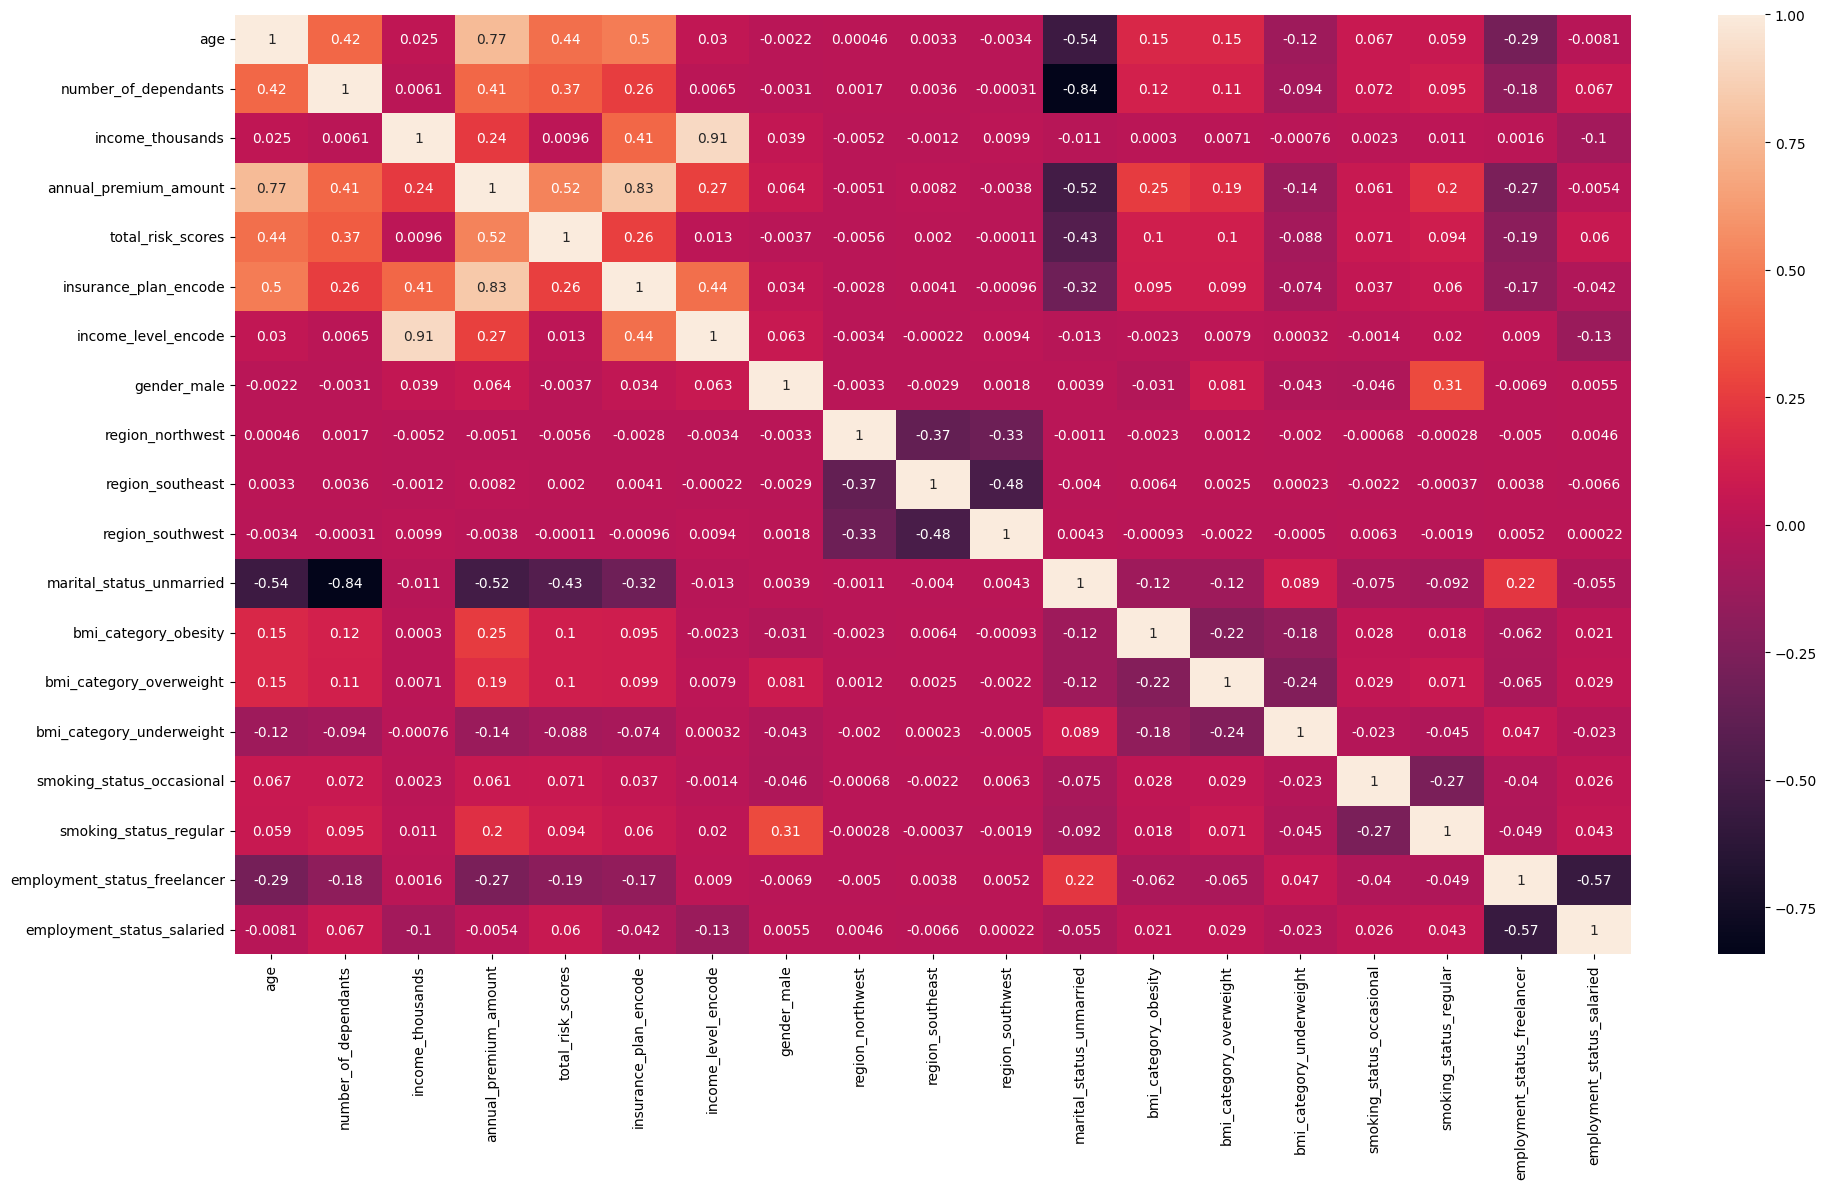

In [68]:
# Feature Selection

# Before doing any further analysis, perform a correlation analysis and disply result using a heatmap

cm = df8.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(cm , annot=True)
plt.tight_layout()
plt.show()


In [69]:
# We can do feature selection using correlation or VIF (variation inflation factor) - various other methods exist

# drop target variabe
X = df8.drop('annual_premium_amount', axis=1)
y = df8['annual_premium_amount']

# Scale all columns (can choose some or apply to all) in X
scaler   = MinMaxScaler()
X_scaled = pd.DataFrame( scaler.fit_transform(X) , columns=X.columns )

# Check the new X_scaled (X_scaled is a DataFrame!)
X_scaled.sample(5)


,age,number_of_dependants,income_thousands,total_risk_scores,insurance_plan_encode,income_level_encode,gender_male,region_northwest,region_southeast,region_southwest,marital_status_unmarried,bmi_category_obesity,bmi_category_overweight,bmi_category_underweight,smoking_status_occasional,smoking_status_regular,employment_status_freelancer,employment_status_salaried
2891,0.018519,0.0,0.757576,0.000000,0.5,1.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16560,0.111111,0.2,0.313131,0.428571,0.0,0.666667,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
42184,0.907407,0.4,0.161616,0.428571,1.0,0.333333,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42854,0.018519,0.4,0.212121,0.000000,0.0,0.333333,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
35624,0.259259,0.8,0.070707,0.357143,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [70]:
# Double check if fit_transform() worked or not. All values should be b/w 0-1 .
X_scaled.describe()


,age,number_of_dependants,income_thousands,total_risk_scores,insurance_plan_encode,income_level_encode,gender_male,region_northwest,region_southeast,region_southwest,marital_status_unmarried,bmi_category_obesity,bmi_category_overweight,bmi_category_underweight,smoking_status_occasional,smoking_status_regular,employment_status_freelancer,employment_status_salaried
count,49905.000000,49905.000000,49905.000000,49905.000000,49905.000000,49905.000000,49905.000000,49905.000000,49905.000000,49905.000000,49905.000000,49905.000000,49905.000000,49905.000000,49905.000000,49905.000000,49905.000000,49905.000000
mean,0.303736,0.343537,0.221120,0.291840,0.397415,0.365922,0.549644,0.200942,0.350366,0.303036,0.513536,0.143192,0.231259,0.155335,0.138283,0.313876,0.308546,0.419397
std,0.253365,0.298405,0.223949,0.287422,0.392463,0.349710,0.497534,0.400709,0.477089,0.459575,0.499822,0.350272,0.421642,0.362227,0.345200,0.464071,0.461898,0.493465
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.074074,0.000000,0.060606,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.240741,0.400000,0.161616,0.357143,0.500000,0.333333,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.600000,0.303030,0.428571,0.500000,0.666667,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
# NOw calculate VIF
def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['column'] =   data.columns
    vif_df['VIF']    =   [variance_inflation_factor(data.values, i) for i in range(data.shape[1]) ]
    return vif_df

# check the VIF 
calculate_vif(X_scaled)


,column,VIF
0,age,4.252915
1,number_of_dependants,4.898275
2,income_thousands,11.186612
3,total_risk_scores,2.681665
4,insurance_plan_encode,3.585076
5,income_level_encode,12.425932
6,gender_male,2.426685
7,region_northwest,2.126557
8,region_southeast,2.967416
9,region_southwest,2.711138


In [72]:
# VIF is very high for 'income_level_encode' =12.425932  and 'income_thousands' =11.186612
# Drop columns one by one and recalculate VIF to see if we need to remove more columns or not.
# Try to remove 'income_level_encode' -> check VIF. Then take further decision.

# check the VIF  with dropped column
calculate_vif( X_scaled.drop('income_level_encode', axis=1) )

# All VIF values are < 5 (rough approximation) - is good. No need to drop more columns

,column,VIF
0,age,4.237910
1,number_of_dependants,4.885454
2,income_thousands,2.471804
3,total_risk_scores,2.681199
4,insurance_plan_encode,3.444362
5,gender_male,2.414433
6,region_northwest,2.124164
7,region_southeast,2.963777
8,region_southwest,2.707935
9,marital_status_unmarried,3.994568


In [73]:
# drop 'income_level_encode' from X_scaled
X_reduced = X_scaled.drop('income_level_encode', axis=1)

X_reduced.sample(5)


,age,number_of_dependants,income_thousands,total_risk_scores,insurance_plan_encode,gender_male,region_northwest,region_southeast,region_southwest,marital_status_unmarried,bmi_category_obesity,bmi_category_overweight,bmi_category_underweight,smoking_status_occasional,smoking_status_regular,employment_status_freelancer,employment_status_salaried
49813,0.092593,0.0,0.141414,1.000000,0.5,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28770,0.462963,0.2,0.313131,0.357143,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
46784,0.074074,0.2,0.303030,0.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
48411,0.000000,0.0,0.000000,0.357143,0.5,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
44916,0.092593,0.0,0.070707,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [74]:

# ================================ FEATURE SELECTION COMPLETE ================================


In [75]:
# Before scaling, check age distribution
print(f"Age range in full dataset: {df8['age'].min()} to {df8['age'].max()}")
print(f"Age distribution:\n{df8['age'].describe()}")


Age range in full dataset: 18 to 72
Age distribution:
count    49905.000000
mean        34.401763
std         13.681724
min         18.000000
25%         22.000000
50%         31.000000
75%         45.000000
max         72.000000
Name: age, dtype: float64


In [76]:

# ================================ FEATURE SELECTION COMPLETE ================================


In [77]:
# Now our features are ready for training.

# Split the data 70%/30% for training/testing, and print thier size to confirm the split.
X_train, X_test, y_train, y_test = train_test_split( X_reduced, y, test_size=0.3, train_size=0.7, random_state=42 )

# check the size
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}")

# Reset index to ensure alignment
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

print(f"X_test.index: {X_test.index.min()} to {X_test.index.max()}, len: {len(X_test)}")
print(f"y_test.index: {y_test.index.min()} to {y_test.index.max()}, len: {len(y_test)}")

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

print(f"X_train.index: {X_train.index.min()} to {X_train.index.max()}, len: {len(X_train)}")
print(f"y_train.index: {y_train.index.min()} to {y_train.index.max()}, len: {len(y_train)}")


X_train: (34933, 17), y_train: (34933,), X_test: (14972, 17), y_test: (14972,)
X_test.index: 0 to 14971, len: 14972
y_test.index: 0 to 14971, len: 14972
X_train.index: 0 to 34932, len: 34933
y_train.index: 0 to 34932, len: 34933


In [78]:
# ==================================================================================================
# Verify the split preserved age distribution

# First, let's reverse transform to get original age values
# We need to create a temporary dataframe with the missing column

def reverse_transform_data(scaled_data, scaler):
    """Helper function to reverse transform scaled data"""
    # Add back the missing column that was dropped after VIF
    temp_df = scaled_data.copy()
    temp_df['income_level_encode'] = 0  # Add with scaled min value
    
    # Reorder columns to match scaler's original order
    temp_df = temp_df[scaler.feature_names_in_]
    
    # Inverse transform
    original_data = pd.DataFrame(
        scaler.inverse_transform(temp_df),
        columns = scaler.feature_names_in_,
        index   = scaled_data.index
    )
    
    return original_data

# Get original values back
X_train_original = reverse_transform_data(X_train, scaler)
X_test_original = reverse_transform_data(X_test, scaler)

print("---------------------------------")
print("TRAIN SET - Age Distribution:")
print("---------------------------------")
# print(X_train_original['age'].describe())
print(f"\nAge range: {X_train_original['age'].min():.1f} to {X_train_original['age'].max():.1f}")

print("---------------------------------")
print("TEST SET - Age Distribution:")
print("---------------------------------")
# print(X_test_original['age'].describe())
print(f"\nAge range: {X_test_original['age'].min():.1f} to {X_test_original['age'].max():.1f}")

print("---------------------------------")
print("COMPARISON:")
print("---------------------------------")
print(f"Train mean age: {X_train_original['age'].mean():.2f}")
print(f"Test mean age: {X_test_original['age'].mean():.2f}")
print(f"Difference: {abs(X_train_original['age'].mean() - X_test_original['age'].mean()):.2f} years")

# ==================================================================================================

---------------------------------
TRAIN SET - Age Distribution:
---------------------------------

Age range: 18.0 to 72.0
---------------------------------
TEST SET - Age Distribution:
---------------------------------

Age range: 18.0 to 72.0
---------------------------------
COMPARISON:
---------------------------------
Train mean age: 34.39
Test mean age: 34.42
Difference: 0.03 years


In [79]:
# Now, train various differnt models as we do not know which one will work well

# Create linear model
model_lr = LinearRegression()

# fit the training data to linear model
model_lr.fit(X_train, y_train)

# predict the values for training data from linear model
train_score = model_lr.score(X_train, y_train)

# predict the values for testing data from linear model
test_score = model_lr.score(X_test, y_test)

train_score, test_score

(0.9281804887711442, 0.9281595905165557)

In [80]:
# Check the intercept and coefficients
model_lr.intercept_


np.float64(509.75700939137096)

In [81]:
model_lr.coef_


array([ 1.12025396e+03, -5.57024860e+01, -4.33296276e+01,  4.87089625e+02,
        1.25313375e+03,  1.57900410e+01, -3.43856880e+00,  3.87408319e+00,
        5.84687412e-01, -8.53759378e+01,  3.32819054e+02,  1.57799796e+02,
        3.49572169e+01,  7.59108054e+01,  2.23529199e+02, -3.68781684e+01,
       -2.24712268e+01])

In [82]:
# just to see the column headers to match with coefficients
X_reduced.columns


Index(['age', 'number_of_dependants', 'income_thousands', 'total_risk_scores',
       'insurance_plan_encode', 'gender_male', 'region_northwest',
       'region_southeast', 'region_southwest', 'marital_status_unmarried',
       'bmi_category_obesity', 'bmi_category_overweight',
       'bmi_category_underweight', 'smoking_status_occasional',
       'smoking_status_regular', 'employment_status_freelancer',
       'employment_status_salaried'],
      dtype='object')

In [83]:
# PLot feature importance on barchart
feature_importance = model_lr.coef_

# create a new df for plotting
coef_df = pd.DataFrame(feature_importance, index=X_test.columns, columns=['coefficients'])

# sort 
coef_df = coef_df.sort_values(by="coefficients", ascending=True)


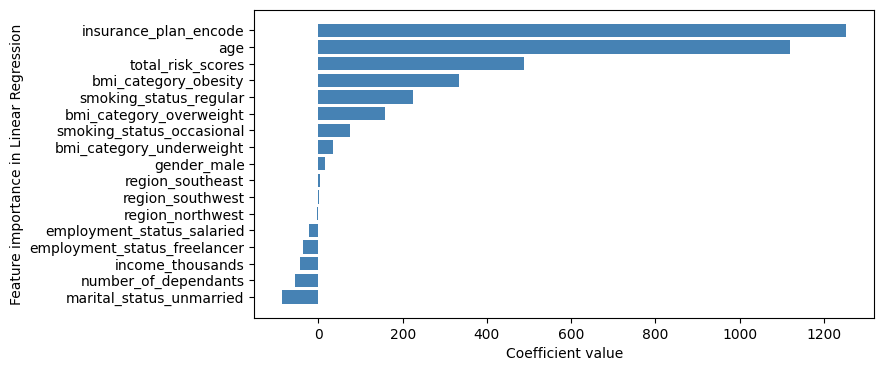

In [84]:
# Plot this on a bar chart
plt.figure( figsize=(8, 4) )
plt.barh( y=coef_df.index, width=coef_df['coefficients'], color='steelblue' )
plt.xlabel('Coefficient value')
plt.ylabel('Feature importance in Linear Regression')
plt.show()


In [85]:
# Since I want to test many models, i will write a function to do so:

def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    """
    Train a model and evaluate it on training and testing data.
    
    Parameters:
    model: The machine learning model to train
    X_train, X_test: Feature data for training and testing
    y_train, y_test: Target data for training and testing
    
    Returns: 
    model: The trained model
    train_score: R2 score on training data
    test_score: R2 score on testing data

    Note:
    => Could include RMSE, MAE, or other metrics, but in this case 
    I chose to use only the R2 score for a quick assessment.
    
    """
    # Fit the model on training data
    model.fit(X_train, y_train)
    
    # Evaluate on training data
    train_score = model.score(X_train, y_train)
    
    # Evaluate on testing data
    test_score = model.score(X_test, y_test)
    
    return model, train_score, test_score

In [86]:
# Use nultiple models

models = {
    'Linear Regression': LinearRegression(),
    'Ridge'            : Ridge(),
    'Lasso'            : Lasso(),
    'Decision Tree'    : DecisionTreeRegressor(),
    'Random Forest'    : RandomForestRegressor(),
    'AdaBoost'         : AdaBoostRegressor(),
    'XGBoost'          : XGBRegressor(),    
}

results = {}

for name, model in models.items():
    trained_model, train_score, test_score = train_and_evaluate( model, X_train, X_test, y_train, y_test )
    results[name] = {'model': trained_model, 'train': train_score, 'test': test_score}
    print(f"{name} - Train: {train_score:.4f}, Test: {test_score:.4f}")


Linear Regression - Train: 0.9282, Test: 0.9282
Ridge - Train: 0.9282, Test: 0.9282
Lasso - Train: 0.9279, Test: 0.9279
Decision Tree - Train: 0.9992, Test: 0.9634
Random Forest - Train: 0.9966, Test: 0.9796
AdaBoost - Train: 0.9498, Test: 0.9503
XGBoost - Train: 0.9859, Test: 0.9814


In [87]:
# Extract the model with highest test score

best_model_name = max( results.keys(), key=lambda x: results[x]['test'] )

# best_model_obj  = results[ best_model_name ]['model'] # in case we need it later

print(f"Best model: {best_model_name}")
print(f"Test score: {results[best_model_name]['test']:.4f}")
print(f"Train score: {results[best_model_name]['train']:.4f}")


Best model: XGBoost
Test score: 0.9814
Train score: 0.9859


In [88]:
# Check number of CPU cores

import multiprocessing as mp
num_cores = mp.cpu_count()
print(f"Number of CPU cores: {num_cores}")


Number of CPU cores: 4


In [89]:
# Run GridSearchCV (intense), RandomizedSearchCV (light) to optimised the model parameters

# Set random state for reproducibility
random_state = 213

# Define model
model_xgb = XGBRegressor(random_state=random_state)

# Define parameter grid
param_grid = {
    "n_estimators"    : [50, 100, 150, 200],
    'learning_rate'   : [0.001, 0.01, 0.05, 0.1, 0.2],
    'max_depth'       : [3, 4, 5, 6, 7],
    'subsample'       : [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma'           : [0, 1, 5]
}

# Perform random search
random_search = RandomizedSearchCV(
                model_xgb, param_grid, n_iter=20, cv=5, scoring='r2', random_state=random_state, n_jobs=num_cores )
random_search.fit(X_train, y_train)

# Print results
print(f"Best R2 score: {random_search.best_score_:.4f}")
print(f"Best parameters: {random_search.best_params_}")


Best R2 score: 0.9817
Best parameters: {'subsample': 0.8, 'n_estimators': 150, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}


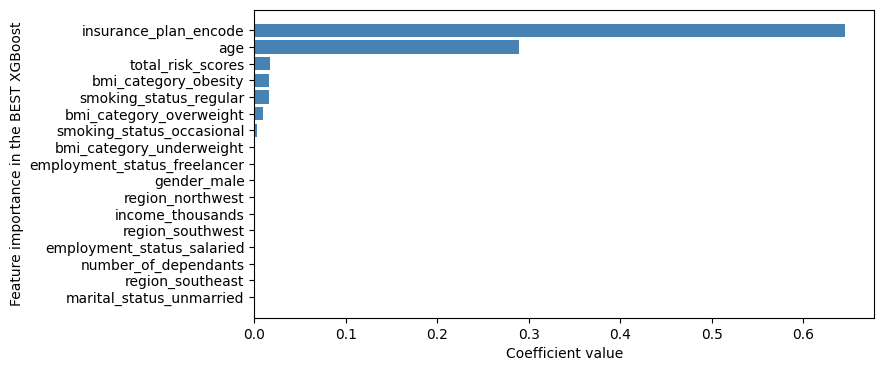

In [90]:
# Get the best model
best_model = random_search.best_estimator_

# plot the feature importance for this best model
feature_importance = best_model.feature_importances_

# Plotting part from code in the previous cells above
coef_df = pd.DataFrame(feature_importance, index=X_test.columns, columns=['coefficients'])
coef_df = coef_df.sort_values(by="coefficients", ascending=True)

plt.figure( figsize=(8, 4) )
plt.barh( y=coef_df.index, width=coef_df['coefficients'], color='steelblue' )
plt.xlabel('Coefficient value')
plt.ylabel('Feature importance in the BEST XGBoost')
plt.show()


In [91]:

# =============================== MODEL DEVELOPMENT AND TRAINING COMPLETED ===============================


In [92]:
print(f"X_test.shape: {X_test.shape}" )

X_test.shape: (14972, 17)


In [93]:
# Error analysis starts here
# R2 should not be the only metrics we should relay upon.

y_pred = best_model.predict( X_test )

residuals     = y_pred - y_test
residuals_pct = residuals*100/y_test

results_df = pd.DataFrame({
    'actual'   : y_test,
    'predicted': y_pred,
    'diff'     : residuals,
    'diff_pct' : residuals_pct
})
results_df.sample(10)

# Observation: same values have 80% error!


,actual,predicted,diff,diff_pct
2354,3061,3055.407715,-5.592285,-0.182695
960,2520,2505.359131,-14.640869,-0.580987
3471,1460,1369.370972,-90.629028,-6.207468
4800,2708,2703.079590,-4.920410,-0.181699
7812,3269,3259.293457,-9.706543,-0.296927
12322,2670,2658.023682,-11.976318,-0.448551
6534,1068,1073.374512,5.374512,0.503231
2504,2565,2608.767578,43.767578,1.706338
5798,3125,3118.302734,-6.697266,-0.214312
9781,2282,2257.251221,-24.748779,-1.084521


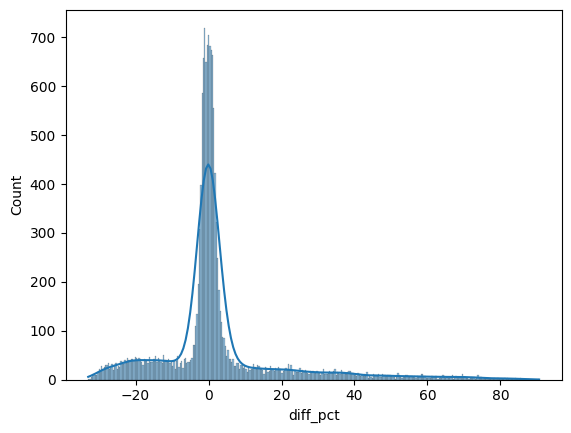

In [94]:
# look at the distribution of errors

sns.histplot(results_df['diff_pct'], kde=True)
plt.show()

# many data points show very high errors.
# more errors should be within +/- 10%


In [95]:
# count the number of records with error outside +/- 10%

extreme_error_thresold = 10

extreme_results_df = results_df[ np.abs(results_df['diff_pct']) > extreme_error_thresold ]

extreme_results_df.sort_values('diff_pct', ascending=False)

# There are 4,363 records with errors outside +/- 10%

,actual,predicted,diff,diff_pct
2056,350,667.085632,317.085632,90.595895
6522,350,656.505615,306.505615,87.573033
14662,356,664.342468,308.342468,86.613053
3990,354,658.063171,304.063171,85.893551
2989,351,651.964233,300.964233,85.744796
...,...,...,...,...
4736,1016,689.356628,-326.643372,-32.149938
13121,947,641.204041,-305.795959,-32.291020
10508,946,639.065430,-306.934570,-32.445515
2809,992,664.873352,-327.126648,-32.976477


In [96]:
print(f"shape of results_df : {results_df.shape}")
print(f"shape of extreme_results_df : {extreme_results_df.shape}")

extreme_error_pct =  100*extreme_results_df.shape[0]/results_df.shape[0]
print(f"% of predictions that have extreme errors > +/- 10% : {extreme_error_pct:.2f}%")


shape of results_df : (14972, 4)
shape of extreme_results_df : (4352, 4)
% of predictions that have extreme errors > +/- 10% : 29.07%


In [97]:
min( X_test.index ), max( X_test.index ), len( X_test )


(0, 14971, 14972)

In [98]:
min( extreme_results_df.index ), max( extreme_results_df.index ), len( extreme_results_df )


(1, 14964, 4352)

In [99]:
# Let's figure out the issue for why these residual errors are so large

# check the indexes in X_test and extreme_results_df

# I want to extract rows from X_test and y_test, that correspond to extreme_results_df['diff_pct'] > +/- 10%

In [100]:
# Let's check the common/intersection of indexes in X_test and extreme_results_df
common_indices = X_test.index.intersection(extreme_results_df.index)

# select only the rows that exist in boeth
extreme_errors_df = X_test.loc[common_indices]
print(f"extreme_errors_df.shape: {extreme_errors_df.shape}")

extreme_errors_df.head(5)


extreme_errors_df.shape: (4352, 17)


,age,number_of_dependants,income_thousands,total_risk_scores,insurance_plan_encode,gender_male,region_northwest,region_southeast,region_southwest,marital_status_unmarried,bmi_category_obesity,bmi_category_overweight,bmi_category_underweight,smoking_status_occasional,smoking_status_regular,employment_status_freelancer,employment_status_salaried
1,0.129630,0.2,0.636364,0.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.074074,0.2,0.080808,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.074074,0.6,0.393939,0.000000,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,0.092593,0.2,0.131313,0.857143,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
12,0.000000,0.0,0.060606,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [101]:
# Check if indices in extreme_results_df are in X_test

missing = extreme_results_df.index.difference(X_test.index)
print(f"Missing indices: {len(missing)}")
print(f"First 5 missing: {missing[:5]}")


Missing indices: 0
First 5 missing: Index([], dtype='int64')


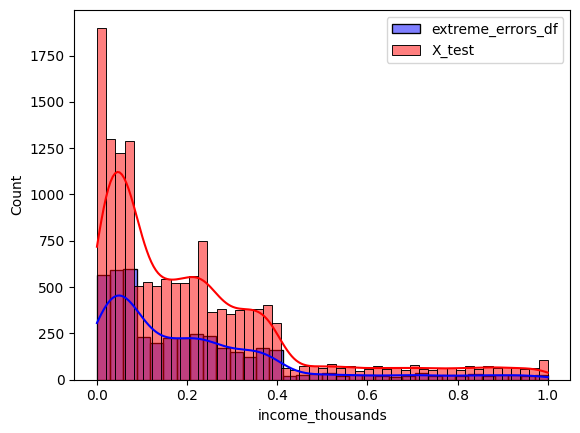

In [102]:
# Let's plot features histogram
sns.histplot( extreme_errors_df.income_thousands, kde=True, color='blue', label="extreme_errors_df" )
sns.histplot( X_test.income_thousands, kde=True, color='red', label="X_test")
plt.legend()
plt.show()

# For income_thousands, the distibition of error in original X_test and extreme_errors_df is same.
# we need to find features where this distribution in X_test and extreme_errors_df is NOT same.


number of columns in X_test.columns: 17


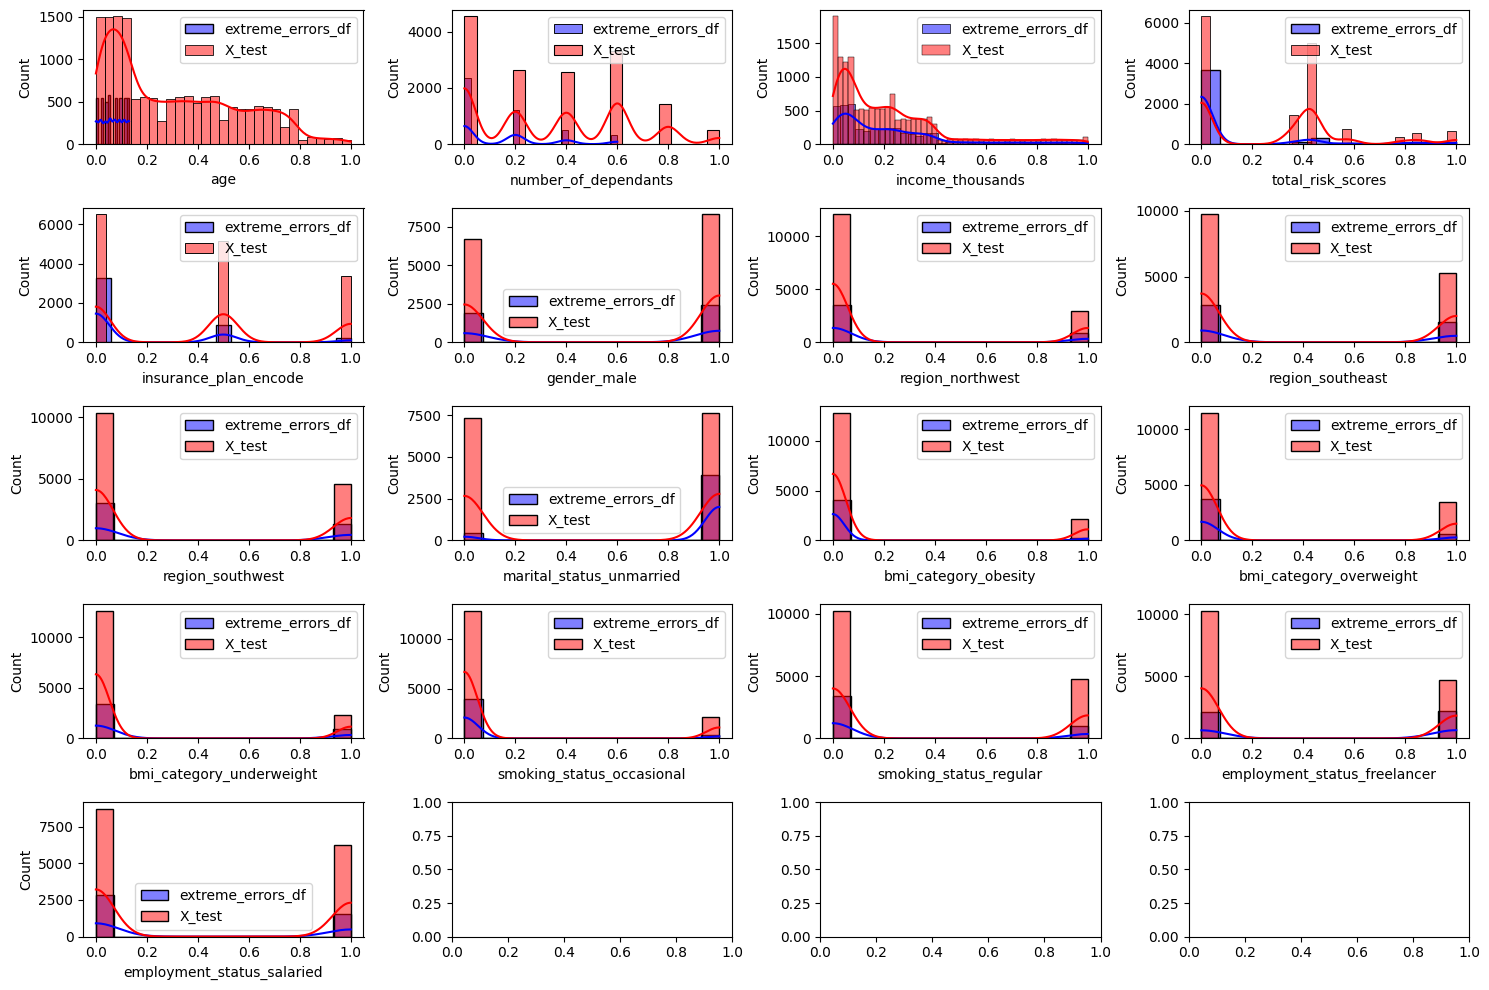

In [103]:
print(f"number of columns in X_test.columns: {len(X_test.columns)}")


fig, axes = plt.subplots(5, 4, figsize=(15,10))
axes = axes.flatten()

for i, feature in enumerate( X_test.columns ):
    sns.histplot( extreme_errors_df[feature], kde=True, color='blue', label="extreme_errors_df" , ax=axes[i])
    sns.histplot( X_test[feature], kde=True, color='red', label="X_test", ax=axes[i])        
    axes[i].legend()

plt.tight_layout()
plt.show()

# Observation: The main issue is in the AGE feature.


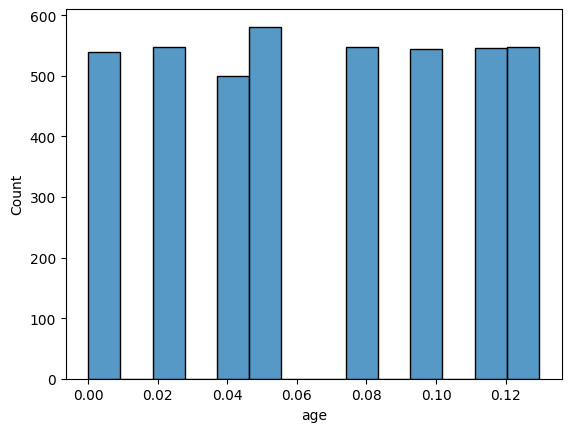

In [104]:
# Inspect into AGE feature (scaled data)

sns.histplot(extreme_errors_df['age'])
plt.show()


In [105]:
# Inspect the AGE feature (un-scaled data)


# Print the columns to verify they match
print(f"Scaler columns ({len(scaler.feature_names_in_)}): {scaler.feature_names_in_}")  # If available
print("---")
print(f"extreme_errors_df columns ({len(extreme_errors_df.columns)}): {extreme_errors_df.columns}")
print("---")

missing_cols = set(scaler.feature_names_in_) - set(extreme_errors_df.columns)
print(f"missing column (DROPPED AFTER VIF check): {missing_cols}")
print("---")

# Add the missing columns back to extreme_errors_df
for col in missing_cols:
    extreme_errors_df[col] = 0

# Get the un-reansformed data back using scaler object
df_reversed = pd.DataFrame(
    scaler.inverse_transform(extreme_errors_df.values),  
    columns = extreme_errors_df.columns,
    index   = extreme_errors_df.index
)
df_reversed.head()


Scaler columns (18): ['age' 'number_of_dependants' 'income_thousands' 'total_risk_scores'
 'insurance_plan_encode' 'income_level_encode' 'gender_male'
 'region_northwest' 'region_southeast' 'region_southwest'
 'marital_status_unmarried' 'bmi_category_obesity'
 'bmi_category_overweight' 'bmi_category_underweight'
 'smoking_status_occasional' 'smoking_status_regular'
 'employment_status_freelancer' 'employment_status_salaried']
---
extreme_errors_df columns (17): Index(['age', 'number_of_dependants', 'income_thousands', 'total_risk_scores',
       'insurance_plan_encode', 'gender_male', 'region_northwest',
       'region_southeast', 'region_southwest', 'marital_status_unmarried',
       'bmi_category_obesity', 'bmi_category_overweight',
       'bmi_category_underweight', 'smoking_status_occasional',
       'smoking_status_regular', 'employment_status_freelancer',
       'employment_status_salaried'],
      dtype='object')
---
missing column (DROPPED AFTER VIF check): {'income_level_encod

,age,number_of_dependants,income_thousands,total_risk_scores,insurance_plan_encode,gender_male,region_northwest,region_southeast,region_southwest,marital_status_unmarried,bmi_category_obesity,bmi_category_overweight,bmi_category_underweight,smoking_status_occasional,smoking_status_regular,employment_status_freelancer,employment_status_salaried,income_level_encode
1,25.0,1.0,64.0,0.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,22.0,1.0,9.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,22.0,3.0,40.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,23.0,1.0,14.0,12.0,1.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
12,18.0,0.0,7.0,0.0,1.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


---------------------------------
FULL TEST SET (X_test) - Age Distribution:
---------------------------------
count    14972.000000
mean        34.424526
std         13.605081
min         18.000000
25%         22.000000
50%         31.000000
75%         45.000000
max         72.000000
Name: age, dtype: float64
---------------------------------
EXTREME ERRORS SUBSET - Age Distribution:
---------------------------------
count    4352.000000
mean       21.516085
std         2.288182
min        18.000000
25%        19.750000
50%        22.000000
75%        24.000000
max        25.000000
Name: age, dtype: float64
---------------------------------
KEY INSIGHT:
---------------------------------
Full test set has 14972 records with ages 18-72
Extreme errors has 4352 records with ages 18-25

This means the model struggles specifically with younger people!


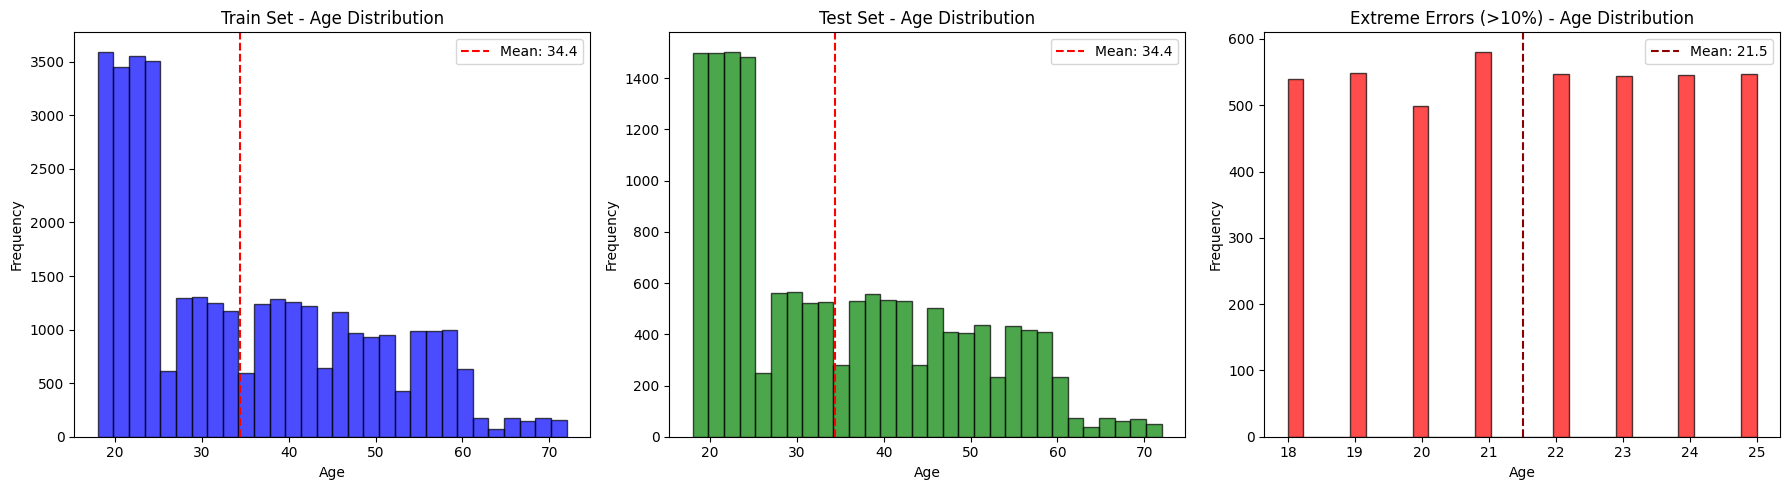

In [106]:
# Compare FULL test set vs EXTREME ERRORS subset

print("---------------------------------")
print("FULL TEST SET (X_test) - Age Distribution:")
print("---------------------------------")
print(X_test_original['age'].describe())

print("---------------------------------")
print("EXTREME ERRORS SUBSET - Age Distribution:")
print("---------------------------------")
print(df_reversed['age'].describe())

print("---------------------------------")
print("KEY INSIGHT:")
print("---------------------------------")
print(f"Full test set has {len(X_test)} records with ages {X_test_original['age'].min():.0f}-{X_test_original['age'].max():.0f}")
print(f"Extreme errors has {len(df_reversed)} records with ages {df_reversed['age'].min():.0f}-{df_reversed['age'].max():.0f}")
print(f"\nThis means the model struggles specifically with younger people!")



fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Train set
axes[0].hist(X_train_original['age'], bins=30, color='blue', alpha=0.7, edgecolor='black')
axes[0].set_title('Train Set - Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].axvline(X_train_original['age'].mean(), color='red', linestyle='--', label=f'Mean: {X_train_original["age"].mean():.1f}')
axes[0].legend()

# Plot 2: Test set
axes[1].hist(X_test_original['age'], bins=30, color='green', alpha=0.7, edgecolor='black')
axes[1].set_title('Test Set - Age Distribution')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')
axes[1].axvline(X_test_original['age'].mean(), color='red', linestyle='--', label=f'Mean: {X_test_original["age"].mean():.1f}')
axes[1].legend()

# Plot 3: Extreme errors subset
axes[2].hist(df_reversed['age'], bins=30, color='red', alpha=0.7, edgecolor='black')
axes[2].set_title('Extreme Errors (>10%) - Age Distribution')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Frequency')
axes[2].axvline(df_reversed['age'].mean(), color='darkred', linestyle='--', label=f'Mean: {df_reversed["age"].mean():.1f}')
axes[2].legend()

plt.tight_layout()
plt.show()


In [107]:
df_reversed.head()


,age,number_of_dependants,income_thousands,total_risk_scores,insurance_plan_encode,gender_male,region_northwest,region_southeast,region_southwest,marital_status_unmarried,bmi_category_obesity,bmi_category_overweight,bmi_category_underweight,smoking_status_occasional,smoking_status_regular,employment_status_freelancer,employment_status_salaried,income_level_encode
1,25.0,1.0,64.0,0.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,22.0,1.0,9.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,22.0,3.0,40.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,23.0,1.0,14.0,12.0,1.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
12,18.0,0.0,7.0,0.0,1.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


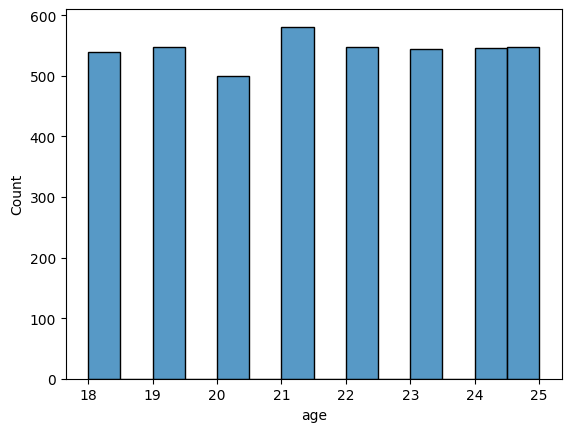

In [108]:
# now plot the histogram of age : un-scaled data

sns.histplot(df_reversed['age'])
plt.show()

# Observation: some issue with age upto 25.


In [109]:
df_reversed.describe()

# In age column, 75% of the values are 23 or below!


,age,number_of_dependants,income_thousands,total_risk_scores,insurance_plan_encode,gender_male,region_northwest,region_southeast,region_southwest,marital_status_unmarried,bmi_category_obesity,bmi_category_overweight,bmi_category_underweight,smoking_status_occasional,smoking_status_regular,employment_status_freelancer,employment_status_salaried,income_level_encode
count,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.0
mean,21.516085,0.724035,21.616268,1.344669,1.303998,2.673024,0.193704,0.353631,0.311811,0.901425,0.059283,0.135800,0.213465,0.090303,0.226333,0.504136,0.348805,0.0
std,2.288182,0.931036,21.248706,3.329351,0.560069,1.490159,0.395245,0.478151,0.463286,0.298125,0.236181,0.342615,0.409800,0.286649,0.418505,0.500040,0.476647,0.0
min,18.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,19.750000,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,22.000000,0.000000,15.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
75%,24.000000,1.000000,30.000000,0.000000,2.000000,4.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0
max,25.000000,3.000000,100.000000,14.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [110]:
df_reversed['age'].quantile(0.99)

# In age column, 99% of the values are 25 or below!


np.float64(25.0)

In [111]:

# ================================ ERROR ANALYSIS COMPLETED ================================


In [112]:
# Now comes the age-based model segmentation based on error analysis



